In [15]:
import numpy as np
import pandas as pd
from scipy.stats import binom, norm
import bplot as bp
import patsy
from scipy.optimize import minimize

In [12]:
def ll_normal(beta,yX):
    y = yX[:,0] 
    X = yX[:,1:] 
    N = X.shape[0]
    mu = np.full(N,np.nan)
    for n in range(N):
        mu[n] = np.sum(X[n,:]*beta)
    d = y - mu
    return np.sum(d * d)

In [4]:
df = pd.read_csv("data/python_model.csv")

In [5]:
df.head()

,app_rating,content_rating
0,4.1,Everyone
1,3.9,Everyone
2,4.7,Everyone
3,4.5,Teen
4,4.3,Everyone


In [7]:
df.shape[0]

9366

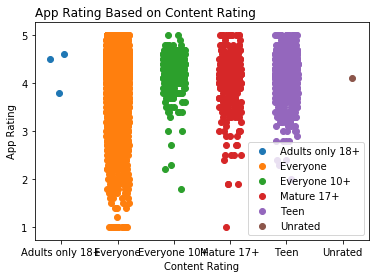

In [10]:
bp.clear()
for i, (name,gdf) in enumerate(df.groupby('content_rating')):
    x = np.repeat(i,gdf['app_rating'].size)
    y = gdf['app_rating']
    bp.jitter(x,y,jitter_y = 0, label = name, color = bp.color[i])

bp.labels(x="Content Rating",y="App Rating")
bp.xticks([0,1,2,3,4,5], np.unique(df['content_rating']))
bp.legend()
bp.title("App Rating Based on Content Rating")

In [11]:
X = patsy.dmatrix("~content_rating", data = df)
yX = np.c_[df['app_rating'], X]

In [16]:
betas = minimize(ll_normal, np.random.normal(size=6), args = yX, method = "BFGS")['x']

In [17]:
betas

array([ 4.2999988 , -0.11362414, -0.04281999, -0.17657146, -0.06651173,
       -0.19999223])

This model means that the intercept of the app is at 4.299 stars. This also means that 